# Lab | Basic Data Cleaning and EDA
For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in the files_for_lab folder.

## Context
An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is and claim amounts. You will help the senior management with some business questions that should help them to better understand their customers, improve their services and improve profitability.

#### Some business Objectives for the case study could be:

Retain customers,
Analyze relevant customer data,
Develop focused customer retention programs.
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

## Instructions
1. Import the necessary libraries.
2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df (i.e. customer_df = pd.readcsv(""))
3. First, look at its main features (head, shape, info).
4. Rename the columns so they follow the PE8 (snake case).
5. Fix the data types of any other column/columns as you might see necessary. Note that sometimes there are some features you might want to use as categorical, but they are read as numerical by python (and vice versa). For eg., if there's a column with year values like 2020, 2021, 2022, etc., this column might be read as numerical by python, but you would want to use that column as categorical data. Hint: One thing you can try is to change date column to datetime format.
6. Plot a correlation matrix, and comment on what you observe.
7. Plot every continuous variable. Comment what you can see in the plots.
8. Do the same with the categorical variables (be careful, you may need to change the plot type to one better suited for continuous data!). Comment what you can see in the plots. You should also delete the column customer_id before you can try to use a for loop on all the categorical columns. Discuss why is deleting the column customer_id required. Hint: Use bar plots to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis.
9. Look for outliers in the continuous variables. (Hint: There’s a good plot to do that!). In case you find outliers, comment on what you will do with them.
10. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

# 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder

# 2. Load data set 
- data file "we_fn_use_c_marketing_customer_value_analysis.csv" into the variable customer_df (i.e. customer_df = pd.readcsv(""))

In [2]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

# 3. First, look at its main features (head, shape, info)

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

# 4. Rename the columns so they follow the PE8 (snake case)

In [6]:
# standardize column name following PE8
customer_df.columns = [customer_df.columns[i].lower().replace(' ', '_') for i in range(len(customer_df.columns))] 

In [7]:
# check columns name
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

# 5. Fix the data types 

In [8]:
# check data types
customer_df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [9]:
customer_df.head(3)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


In [10]:
# after checking data >> "effective_to_date" can be changed to datetime format
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [11]:
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

# 6. Plot a correlation matrix


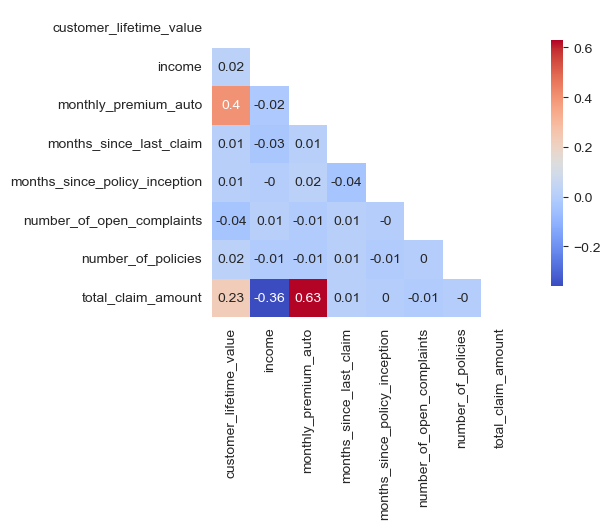

In [12]:

data_corr = customer_df.corr()
correlations_matrix = round(data_corr,2)

mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(8, 4))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True, square=True, cbar_kws={"shrink":.8}, cmap='coolwarm')

#### What I see in this correlation matrix
- From the correlation matrix, no multicolinearity was observed
- Somehow, "total_claim_amount" vs "income", and "monthly_premium_auto" shows a bit higher correlation score comparing to other columns
- And "customer_lifetime_value" shows some level of correlation with "monthly_premium_auto" 

# 7. Plot every continuous variable 

In [13]:
# Get the numeric data into dataframe called numerical 
numerical = customer_df.select_dtypes(include="number")

In [14]:
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [15]:
# after checking some columns. 
# My opinion, "number_of_open_complaints" & "number_of_policies" can be considered categorical (see data below)

print("number_of_open_complaints has", numerical['number_of_open_complaints'].nunique(), "values")
print("each value has (n) rows", "\n", numerical['number_of_open_complaints'].value_counts(), "\n")
print("number_of_policies has", numerical['number_of_policies'].nunique(), "values")
print("each value has (n) rows", "\n", numerical['number_of_policies'].value_counts())

number_of_open_complaints has 6 values
each value has (n) rows 
 0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64 

number_of_policies has 9 values
each value has (n) rows 
 1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: number_of_policies, dtype: int64


In [16]:
# So I remove them from numerical (move them to categorical) & plot distplot again

numerical = numerical.drop(['number_of_open_complaints', 'number_of_policies'], axis = 1)


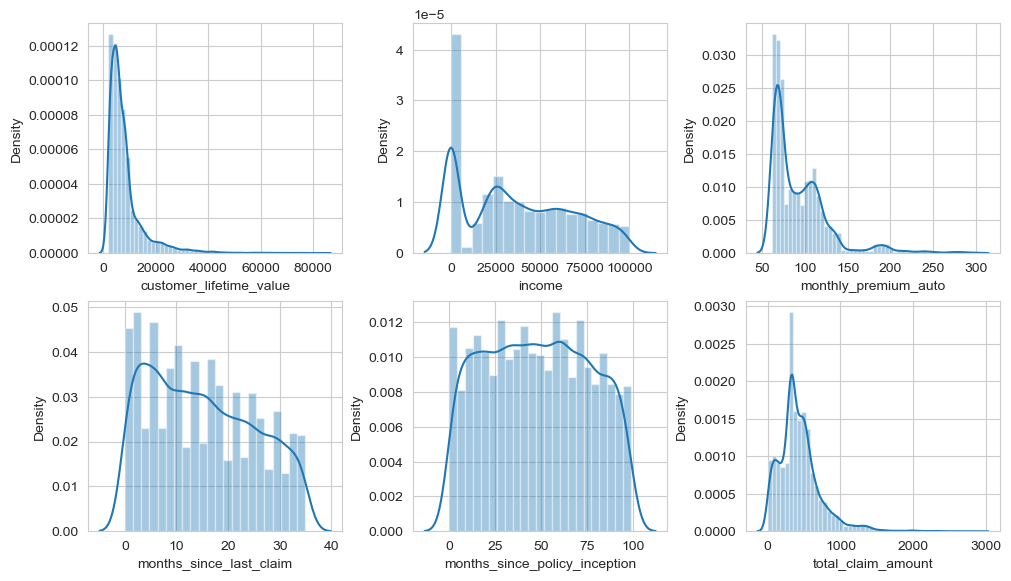

In [17]:
enum = list(enumerate(numerical, start = 1)) 

plt.figure(figsize = (10, 8), constrained_layout = True)

for i in enum:
    plt.subplot(3, 3, i[0]) 
    sns.distplot(numerical[(i[1])])
    

#### What I see in plots
- Customer_lifetime_value monthly_premium_auto and total_claim_amount skew right
- None these columns are normal distributed. But if we work on customer_lifetime_value, it might look a bit more normal distributed.

# 8. Do the same with the categorical variables 

In [18]:
# Get the categorical columns in a dataframe called categorical
categorical = customer_df.select_dtypes(include="object")

In [19]:
# get all categorical column in one cat data frame
cat = pd.concat([categorical, customer_df[['number_of_open_complaints', 'number_of_policies']]], axis=1)
cat.shape

(9134, 17)

In [20]:
cat.head(3)

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,number_of_open_complaints,number_of_policies
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2


In [21]:
# remove customer (id)
cat = cat.drop(['customer'], axis = 1)

In [22]:
# check value_counts for each column

for column in cat.columns:
    print("\n" + column)
    print(cat[column].value_counts())


state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

response
No     7826
Yes    1308
Name: response, dtype: int64

coverage
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

employmentstatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

gender
F    4658
M    4476
Name: gender, dtype: int64

location_code
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

marital_status
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

policy_type
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int

In [23]:
# check number of columns in categorical data frame to set up the plot layout >> 16 columns
cat.shape

(9134, 16)

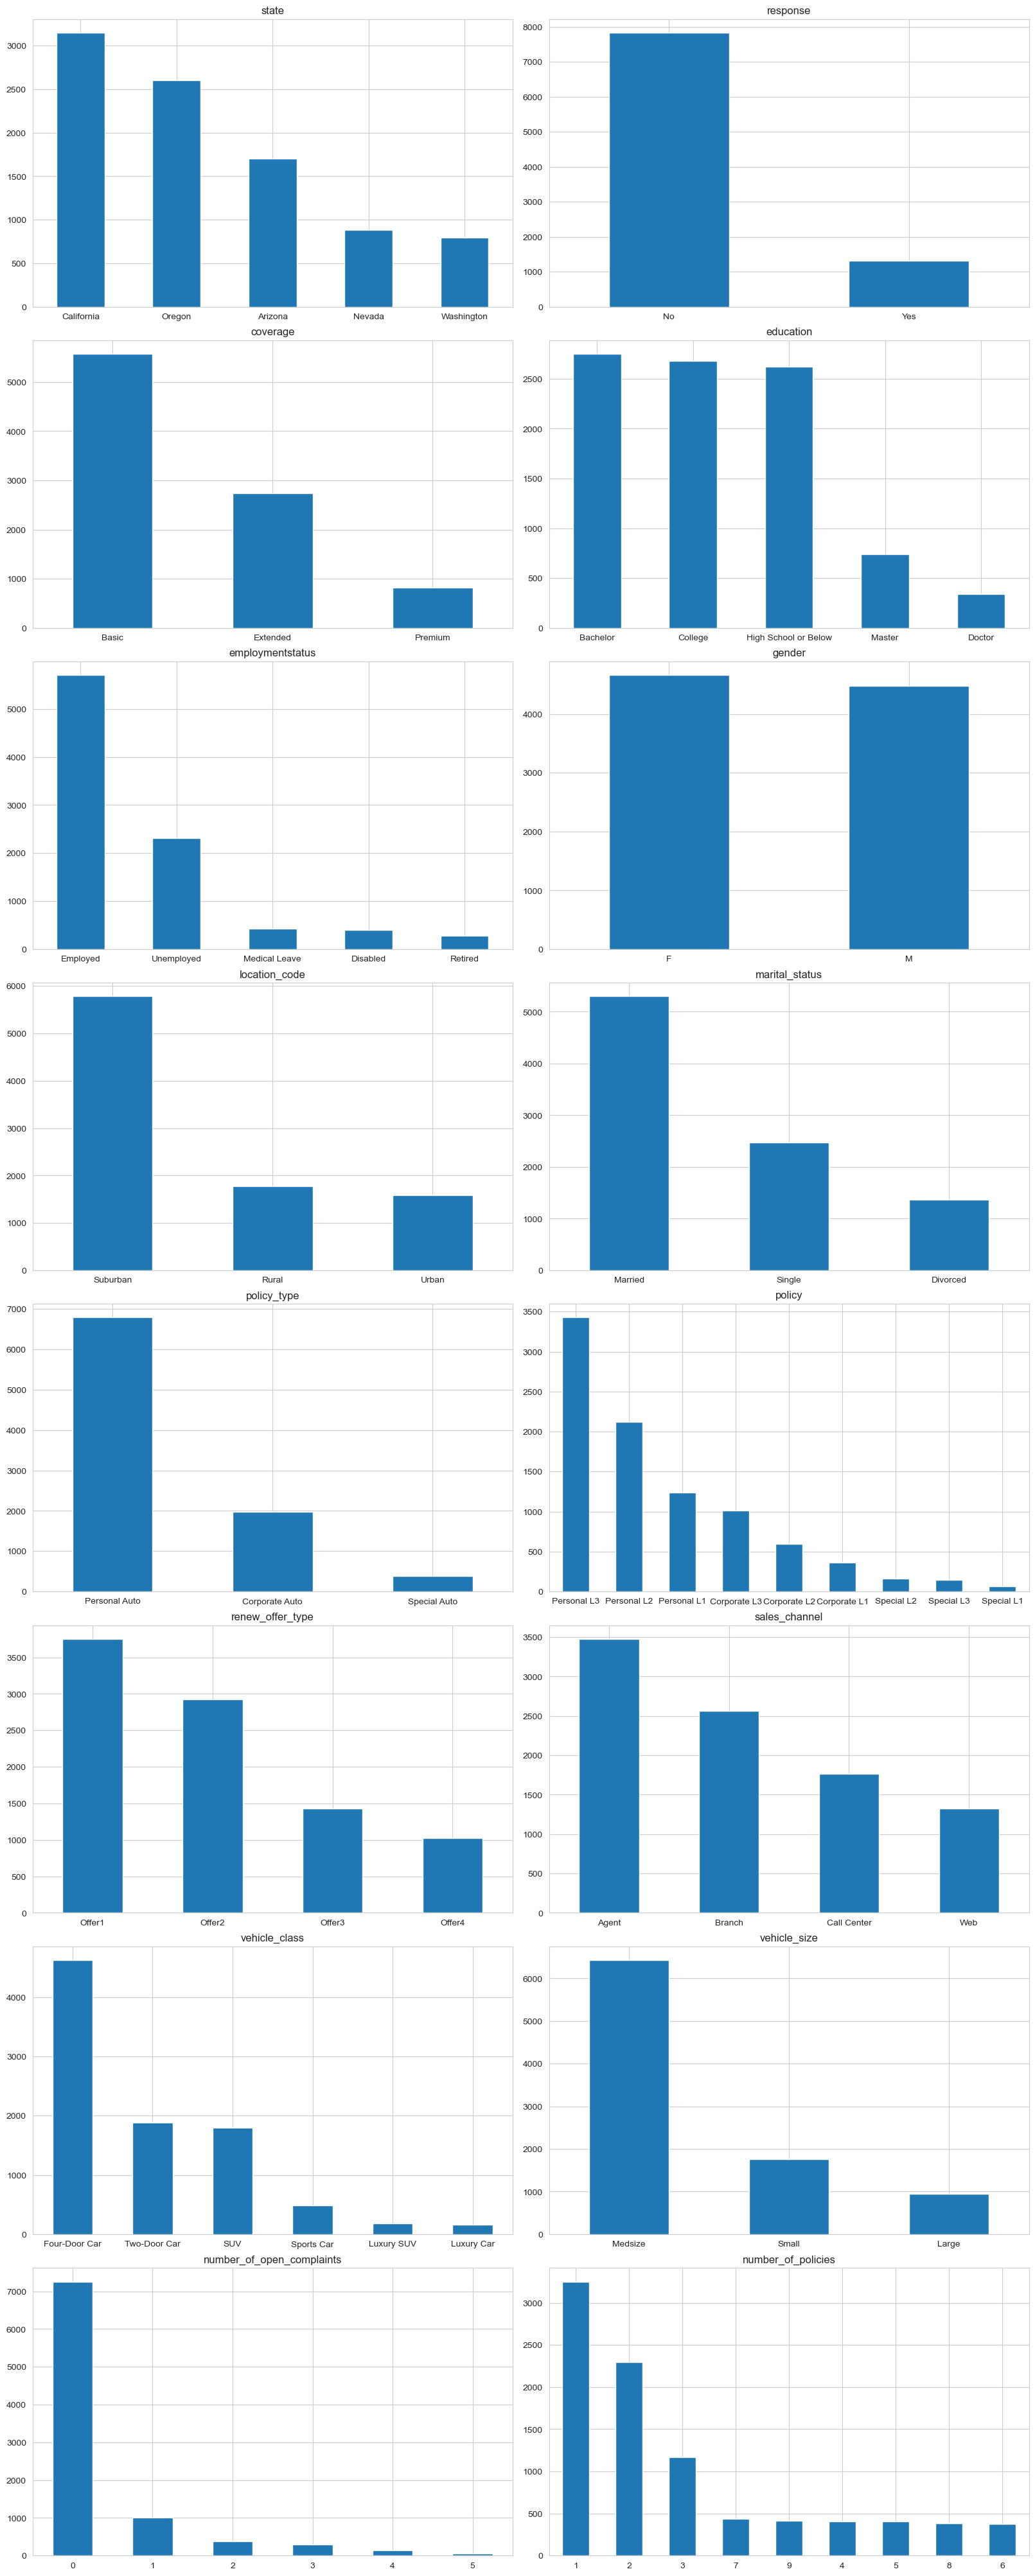

In [24]:
# bar plot for all categorical column (with value_counts())

fig = plt.figure(figsize = (16, 40), constrained_layout = True)

for i, column in enumerate(cat.columns):
    fig.add_subplot(8, 2, i + 1) # plot in 8 rows, 2 columns
    cat[column].value_counts().plot(kind="bar", title=column, rot=0) 
    
    
##### ignore below this line #####    
    # cat[column].value_counts().plot(kind="bar", ax=plt.gca(), title=column, rot=0) #gca() stands for get current axes
    

##### Note to myself:

More about gca():
- [Matplotlib GCA in Python Explained with Examples](https://www.pythonpool.com/matplotlib-gca/)
- [How does plt.gca work internally](https://stackoverflow.com/questions/45381589/how-does-plt-gca-work-internally)

# 9. Look for outliers in the continuous variables. 

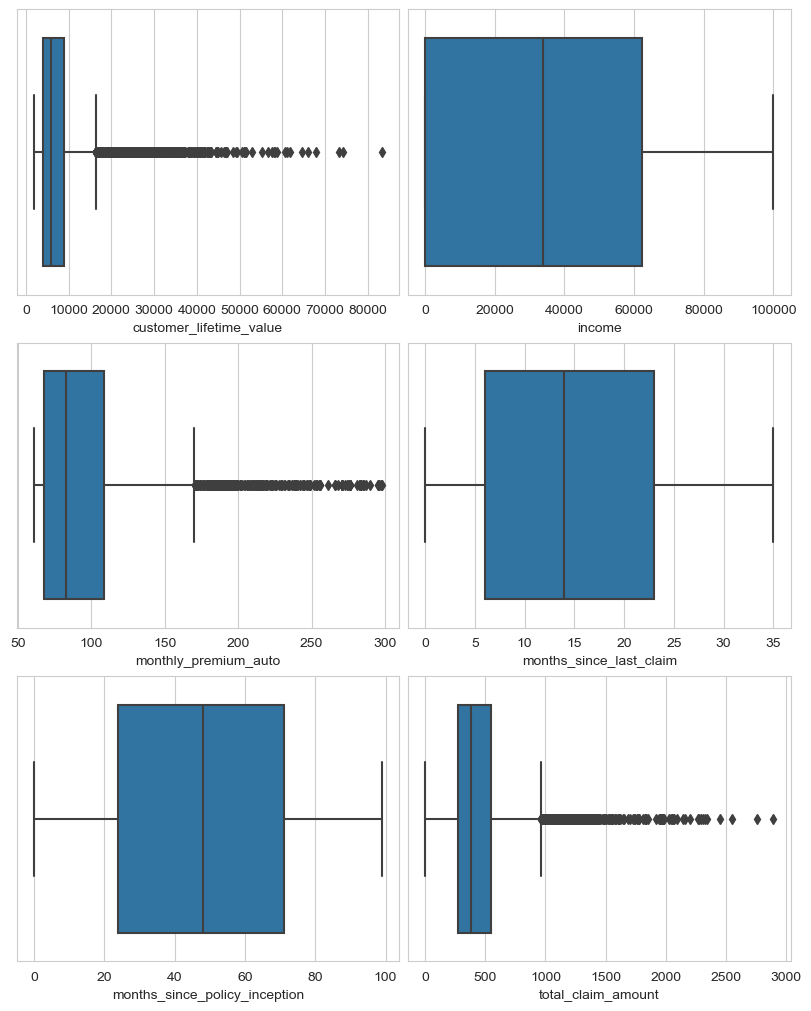

In [25]:
# first check (visualize) outliers using boxplot

fig = plt.figure(figsize = (8, 10), constrained_layout = True)

for i, column in enumerate(numerical.columns):
    fig.add_subplot(3, 2, i + 1) # plot in 3 rows, 2 columns
    sns.boxplot(x=numerical[column])


#### What I see
- Two columns (customer_lifetime_value and total_claim_amount) have some values that are way higher than most of values in that column. 
- But to me, it doesn't look like an outlier 
    >> e.g. in customer_lifetime_value column from boxplot (where the max: 83325.38), if we look closely there are many values that quite close to 80000 as listed below
       
               Showing top 10 values from "customer_lifetime_value" column
               """
               index    value
                5716    83325.38
                1974    74228.52
                6252    73225.96
                7283    67907.27
                5279    66025.75
                7303    64618.76
                3760    61850.19
                8825    61134.68
                4126    60556.19
                2908    58753.88
                Name: customer_lifetime_value, dtype: float64
               """

     >> So I won't take it as an outlier
     

- Same with "total_claim_amount" column

               Showing top 10 values from "total_claim_amount" column
               """
               index    value
                888     2893.24
                5074    2759.79
                4930    2552.34
                9049    2452.89
                248     2345.41
                3557    2327.17
                7250    2306.51
                2895    2294.63
                8825    2275.27
                5773    2270.51
                Name: total_claim_amount, dtype: float64
               """

     >> Those top values are not considered outliers (in my opinion)



### Take a closer look for "customer_lifetime_value" and "total_claim_amount" columns

#### customer_lifetime_value

<AxesSubplot:xlabel='customer_lifetime_value'>

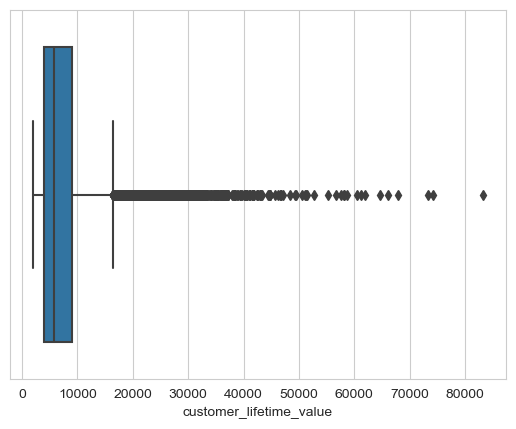

In [26]:
sns.boxplot(x=numerical['customer_lifetime_value'])

In [27]:
# check describtive data for 'customer_lifetime_value'

round(numerical['customer_lifetime_value'].describe(), 2)

count     9134.00
mean      8004.94
std       6870.97
min       1898.01
25%       3994.25
50%       5780.18
75%       8962.17
max      83325.38
Name: customer_lifetime_value, dtype: float64

In [28]:
# show top 10 values in 'customer_lifetime_value' that look like outliers in the boxplot
round(numerical['customer_lifetime_value'].sort_values(ascending=False), 2).head(10)

5716    83325.38
1974    74228.52
6252    73225.96
7283    67907.27
5279    66025.75
7303    64618.76
3760    61850.19
8825    61134.68
4126    60556.19
2908    58753.88
Name: customer_lifetime_value, dtype: float64

### total_claim_amount

<AxesSubplot:xlabel='total_claim_amount'>

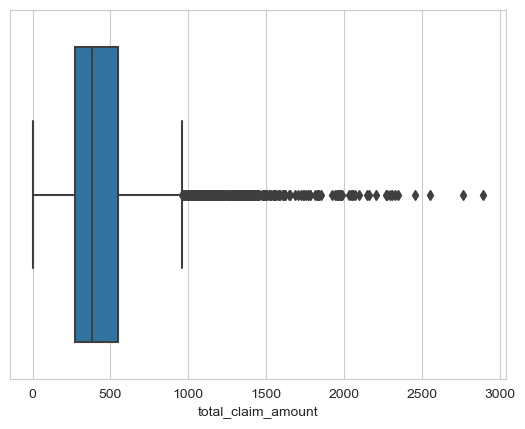

In [29]:
sns.boxplot(x=numerical['total_claim_amount'])

In [30]:
# check describtive data for 'customer_lifetime_value'

round(numerical['customer_lifetime_value'].describe(), 2)

count     9134.00
mean      8004.94
std       6870.97
min       1898.01
25%       3994.25
50%       5780.18
75%       8962.17
max      83325.38
Name: customer_lifetime_value, dtype: float64

In [31]:
round(numerical['total_claim_amount'].sort_values(ascending=False), 2).head(10)

888     2893.24
5074    2759.79
4930    2552.34
9049    2452.89
248     2345.41
3557    2327.17
7250    2306.51
2895    2294.63
8825    2275.27
5773    2270.51
Name: total_claim_amount, dtype: float64

# 10. Check all columns for NaN values. 

In [32]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

#### Comment 
- There is no null in this data set